# Examen final de Desarrollo de Aplicaciones para la Visualización de Datos

Nombre: Paula

Apellidos: Pijoan Gros


Tiempo: 2 horas y 30 minutos

## Contexto del ejercicio

El Ayuntamiento de Madrid desea entender en más detalle la situación del problema habitacional en la ciudad de Madrid basada en múltiples fuentes de datos como alquiler vacacional, evolución del precio de alquiler, inflacción y densidad poblacional.

El objetivo del análisis es buscar patrones para entender mejor que está sucediendo, que barrios son los más estresados y que factores son que hacen que el precio de la vivienda esté en máximos. Por lo tanto, se pide:

1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes. (3 Puntos)
2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)
3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)
4. Concluir todo este análisis haciendo un informe con 2 páginas como mínimo que incluya, preguntas que se van a responder, dashboard resumen que sustente las preguntas y recomendaciones para mejorar la situación habitacional a partir de los resultados obtenidos de los análisis realizados con los datos. (3 Puntos)

## Juego de datos

Para realizar este análisis se provee un juego de datos con las siguientes variables:


| **Variable**           | **Descripción**                                                                                     | **Tipo**                 |
|-------------------------|-----------------------------------------------------------------------------------------------------|--------------------------|
| `neighbourhood_group`   | Grupo de vecindarios o distritos en Madrid.                                                        | Categórica               |
| `date`                 | Fecha de la observación en formato `YYYY-MM-DD`.                                                   | Temporal                 |
| `m2_price`             | Precio promedio por metro cuadrado en euros.                                                       | Cuantitativa continua     |
| `inflation`            | Inflación mensual como porcentaje (incremento en los precios al consumidor).                       | Cuantitativa continua     |
| `HICP`                 | Índice armonizado de precios al consumidor (indicador de inflación en la zona euro).               | Cuantitativa continua     |
| `population_density`   | Densidad de población anual por km² para toda la Comunidad de Madrid.                                                  | Cuantitativa continua     |
| `listings_count`       | Número total de propiedades listadas en Airbnb en un vecindario.                                   | Cuantitativa discreta     |
| `minimum_nights`       | Número mínimo de noches requerido para alquilar una propiedad.                                     | Cuantitativa discreta     |
| `nigth_price`          | Precio promedio por noche de las propiedades en Airbnb.                                            | Cuantitativa continua     |
| `availability_365`     | Número de días al año que una propiedad está disponible para alquilarse.                           | Cuantitativa discreta     |
| `listing_reviews`      | Número promedio de reseñas por propiedad listada.                                                 | Cuantitativa continua     |
| `number_of_reviews`    | Total acumulado de reseñas para todas las propiedades en un vecindario.                            | Cuantitativa discreta     |
| `reviews_per_month`    | Número promedio de reseñas recibidas por una propiedad al mes.                                     | Cuantitativa continua     |
| `hosts_count`          | Número de anfitriones activos en un vecindario.                                                   | Cuantitativa discreta     |
| `Private_room`         | Número de propiedades que ofrecen habitaciones privadas.                                           | Cuantitativa discreta     |
| `Entire_home`          | Número de propiedades que ofrecen viviendas completas.                                             | Cuantitativa discreta     |
| `Hotel_room`           | Número de propiedades categorizadas como habitaciones de hotel.                                    | Cuantitativa discreta     |
| `Shared_room`          | Número de propiedades que ofrecen habitaciones compartidas.                                        | Cuantitativa discreta     |


Ejemplos de preguntas que se pueden realizar a los datos:
1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?
2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?
3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?
4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?
5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?
6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

Nota:
- Puedes hacer group_by para sacar variables agregadas por fecha.
- Se valorará la creatividad en las hipótesis, soluciones y limpieza del código y visualizaciones.

## Entrega del exámen

Compartir Url de github con:
- notebook que responde a las preguntas 1, 2 y 3
- PDF respondiendo a la pregunta 4

Puedes entregar el exámen en el siguiente enlace:

https://forms.gle/xe3En2raC3C3UUY39


# Librerías necesarias

In [36]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Análisis descriptivos


Pregunta 1: Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes.

In [2]:
df = pd.read_csv('housing_time_series_by_madrid_neighbourhood.csv')
df

,neighbourhood_group,date,m2_price,inflation,HICP,population_density,listings_count,minimum_nights,nigth_price,availability_365,listing_reviews,number_of_reviews,reviews_per_month,hosts_count,Private_room,Entire_home,Hotel_room,Shared_room
0,Centro,2010-08-01,15.30,0.3,1.6,796,1,2.000000,114.000000,305.000000,1,155.000000,0.900000,1,0,1,0,0
1,Centro,2011-01-01,15.60,-0.7,3.0,800,1,2.000000,114.000000,305.000000,1,155.000000,0.900000,1,0,1,0,0
2,Centro,2011-02-01,15.40,0.1,3.4,800,4,7.000000,184.000000,44.250000,4,100.000000,0.592500,3,0,4,0,0
3,Centro,2011-05-01,15.00,0.0,3.4,800,5,9.600000,61.000000,134.600000,11,264.400000,1.612000,4,1,4,0,0
4,Centro,2011-06-01,15.00,-0.1,3.0,800,5,5.400000,135.333333,129.200000,15,289.800000,1.768000,4,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,Barajas,2023-08-01,13.32,0.5,2.4,872,46,1.347826,87.136364,188.652174,208,229.543478,5.765870,30,22,20,0,4
2214,Barajas,2023-09-01,13.56,0.2,3.3,872,61,1.311475,70.491228,189.049180,387,198.245902,5.335738,40,40,18,0,3
2215,Barajas,2023-10-01,13.70,0.3,3.5,872,66,1.424242,75.064516,180.575758,538,185.590909,5.225000,43,41,21,0,4
2216,Barajas,2023-11-01,14.00,-0.3,3.3,872,59,1.372881,73.410714,172.016949,424,206.830508,6.065932,39,38,18,0,3


In [4]:
df.dtypes

,0
neighbourhood_group,object
date,object
m2_price,float64
inflation,float64
HICP,float64
population_density,int64
listings_count,int64
minimum_nights,float64
nigth_price,float64
availability_365,float64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  2218 non-null   object 
 1   date                 2218 non-null   object 
 2   m2_price             2218 non-null   float64
 3   inflation            2218 non-null   float64
 4   HICP                 2218 non-null   float64
 5   population_density   2218 non-null   int64  
 6   listings_count       2218 non-null   int64  
 7   minimum_nights       2218 non-null   float64
 8   nigth_price          2218 non-null   float64
 9   availability_365     2218 non-null   float64
 10  listing_reviews      2218 non-null   int64  
 11  number_of_reviews    2218 non-null   float64
 12  reviews_per_month    2218 non-null   float64
 13  hosts_count          2218 non-null   int64  
 14  Private_room         2218 non-null   int64  
 15  Entire_home          2218 non-null   i

In [6]:
df.describe()

,m2_price,inflation,HICP,population_density,listings_count,minimum_nights,nigth_price,availability_365,listing_reviews,number_of_reviews,reviews_per_month,hosts_count,Private_room,Entire_home,Hotel_room,Shared_room
count,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000
mean,12.884472,0.166231,1.914022,827.942290,124.464833,7.589035,102.360413,148.970967,414.588819,164.314739,1.889709,78.683950,26.623084,96.818305,0.407124,0.616321
std,2.888559,0.666500,2.713414,23.770617,412.596548,18.549503,58.535410,60.178316,1513.534338,87.886635,0.904405,213.730695,60.076064,350.536951,1.732619,3.594493
min,7.400000,-1.900000,-1.500000,795.000000,1.000000,1.000000,17.000000,0.000000,1.000000,16.000000,0.130000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,10.900000,-0.100000,0.000000,807.000000,6.000000,2.811542,73.000000,116.342466,14.000000,108.456967,1.330096,5.000000,2.000000,3.000000,0.000000,0.000000
50%,12.400000,0.200000,1.300000,827.000000,24.000000,4.219807,94.500000,146.699311,69.500000,141.351449,1.742725,20.000000,9.000000,13.000000,0.000000,0.000000
75%,14.900000,0.500000,2.900000,842.000000,78.000000,6.684170,123.567174,172.385894,224.750000,192.506818,2.327988,63.000000,27.000000,50.000000,0.000000,0.000000
max,22.500000,3.000000,10.700000,872.000000,4438.000000,390.000000,1099.000000,364.000000,18161.000000,618.500000,6.528182,2138.000000,703.000000,3673.000000,20.000000,61.000000


In [7]:
df.isna().sum()

,0
neighbourhood_group,0
date,0
m2_price,0
inflation,0
HICP,0
population_density,0
listings_count,0
minimum_nights,0
nigth_price,0
availability_365,0


Hago un primer analisis incial de mis datos para saber el tipo de datos que tengo, que estructura tienen, cual es el maximo, cual es el minimo y el número de NAs que tuviese en caso de haber para poder eliminarlas antes de proceder a la realización de mi modelo. En este caso, observo que tengo 18 columnas (variables) y 2217 filas con datos.

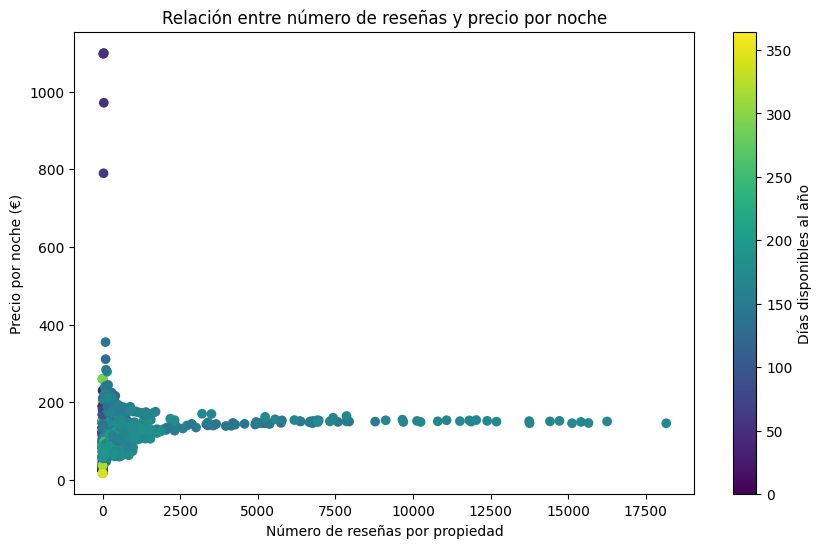

In [12]:
### Grafica 1: ¿Hace el número de reseñas que tiene una casa/habitación que el precio aumente?

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['listing_reviews'],
    df['nigth_price'],
    c=df['availability_365'],
    cmap='viridis'
)

cbar = plt.colorbar(scatter)
cbar.set_label('Días disponibles al año')

plt.title('Relación entre número de reseñas y precio por noche')
plt.xlabel('Número de reseñas por propiedad')
plt.ylabel('Precio por noche (€)')

plt.show()


Aunque se realizará un analisis más extensivo en el documento final, a través de esta grafica podemos visualizar si el número de reseñas que tiene una propiedad afecta su precio por noche. Es decir, una propiedad que tiene muchas reseñas tiene un precio mayor que una propiedad con menos reseñas?

En este caso, a través del gráfico se concluye que:


*   La mayoría de las propiedades tienen menos de 2,500 reseñas, lo que indica que solo un pequeño porcentaje de propiedades es muy popular.
La mayoría de los precios por noche están concentrados por debajo de los 200 €, aunque hay valores extremos (outliers) con precios superiores a 1,000 €.
* Adicionalmente, el gráfico me permite ver el número de dias que esta disponible una propiedad donde observo que las propiedades con días disponibles más altos (en amarillo/verde) tienden a concentrarse en precios bajos (menores a 200 €), lo que puede indicar que propiedades económicas están más frecuentemente disponibles.

A modo conclusión, no hay una relación clara entre el número de reseñas y un aumento en el precio por noche. Esto sugiere que las reseñas no son el único factor determinante del precio, sino que puede que influyan otros elementos.




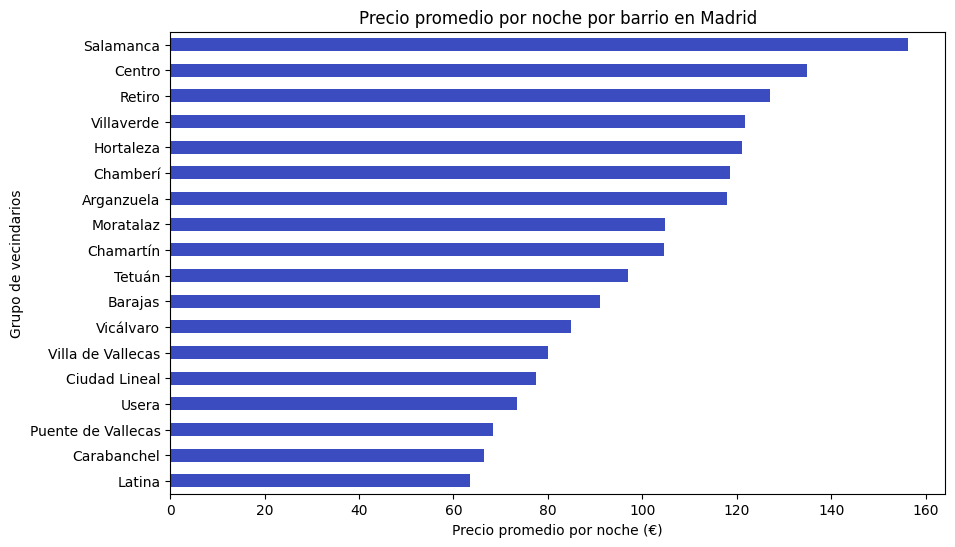

In [15]:
## Gráfico 2: ¿Los precios por noche como se distribuyen geográficamente en los barrios de Madrid? ¿Hay algunas zonas donde los precios estén más altos que en otras?

average_price_per_neighbourhood = df.groupby('neighbourhood_group')['nigth_price'].mean()

plt.figure(figsize=(10, 6))
average_price_per_neighbourhood.sort_values().plot(kind='barh', colormap='coolwarm')

plt.title('Precio promedio por noche por barrio en Madrid')
plt.xlabel('Precio promedio por noche (€)')
plt.ylabel('Grupo de vecindarios')

plt.show()



A modo conclusión:
* El barrio de Salamanca tiene el precio promedio por noche más alto, seguido por Centro y Retiro. Posiblemente, este gráfico puede ser un indicador de cuales son los barrios más atractivos para el mercado de alquiler vacacional, posiblemente debido a su ubicación céntrica, servicios de alta calidad, y demanda turística.

* La Latina, Carabanchel y Puente de Vallecas tienen los precios más bajos. Esto podría deberse a una menor demanda turística o a que estos barrios son más residenciales y menos orientados al alquiler vacacional.

* Por último, la gráfica muestra una desigualdad bastante significativa en los precios promedio por noche entre barrios. Los barrios más caros tienen precios significativamente más altos que los más accesibles, lo que sugiere un impacto directo en la distribución del mercado turístico frente al residencial.

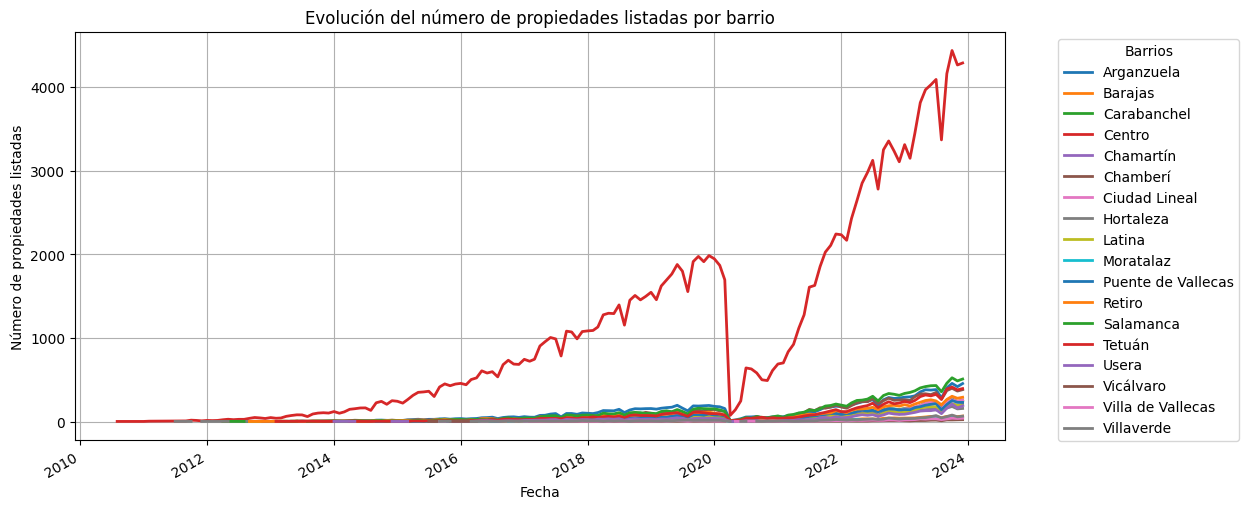

In [20]:
### Gráfico 3: ¿Han evolucionado el número de propiedades listadas a lo largo del tiempo? ¿En que barrios?

df['date'] = pd.to_datetime(df['date'])

propiedades_tiempo = df.groupby(['date', 'neighbourhood_group'])['listings_count'].sum().unstack()

plt.figure(figsize=(12, 6))
propiedades_tiempo.plot(ax=plt.gca(), linewidth=2)

plt.title('Evolución del número de propiedades listadas por barrio')
plt.xlabel('Fecha')
plt.ylabel('Número de propiedades listadas')
plt.legend(title='Barrios', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

plt.show()


* En este caso, a través del gráfico 3 se observa como el barrio Centro es el que más crecimiento muestra en cuanto al número de propiedades listadas. Desde 2014, ha tenido un crecimiento pronunciado, alcanzando más de 4,000 propiedades en los últimos años. Esto lo posiciona como el barrio con mayor orientación al mercado turístico, dejando en evidencia su predominancia en la oferta de alquiler vacacional.
* Barrios como Salamanca, Retiro, y Chamberí presentan un aumento progresivo pero mucho más moderado en comparación con Centro. Esto sugiere que estos barrios están diversificando su oferta turística sin que esta se convierta en un fenómeno tan dominante.
* Barrios como Villaverde, Carabanchel, y Puente de Vallecas muestran un crecimiento muy limitado en el número de propiedades, lo que podría indicar que son menos atractivos para el mercado turístico o que conservan un enfoque residencial más marcado.
* Se observa una caída abrupta en 2020, coincidiendo con la pandemia de COVID-19. Esto refleja el impacto directo de eventos globales en el mercado turístico, con una contracción significativa en la oferta de propiedades listadas, probablemente debido a la disminución del turismo.

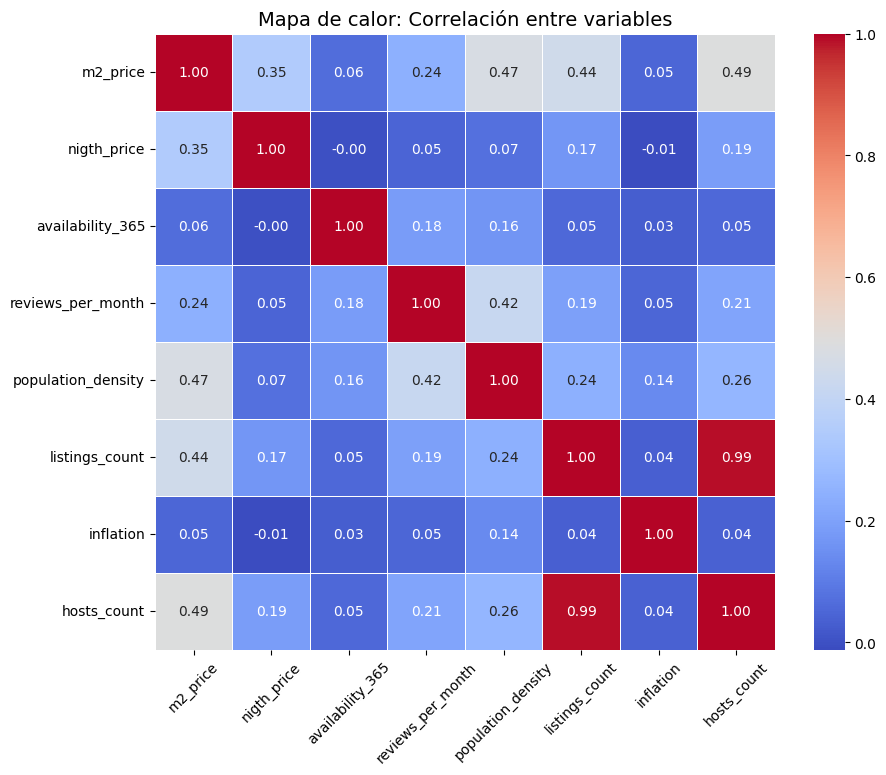

In [55]:
### Gráfico 4: Mapa de correlación entre mis variables - ¿Que variables afectan más el precio de un alojamiento por noche o el precio de su metro cuadrado?

columnas = ['m2_price', 'nigth_price', 'availability_365', 'reviews_per_month',
                      'population_density', 'listings_count', 'inflation', 'hosts_count']
correlation_matrix = df[columnas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Mapa de calor: Correlación entre variables', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()


Correlaciones del precio por metro cuadrado:


*   Existe una relación positiva entre m2_price y hosts_count de manera que esto sugiere que los barrios con más anfitriones tienen a tener los precios más altos por metro cuadrado.
* Correlación con population density tambien es alta siendo esta 0.47 lo que sugiere que en barrios más densos hay una mayor presión habitacional que podría estar impulsando los precios.
* Correlación media tambien con listings_count (0.44) lo que indica que los barrios con propiedades listadas suelen tener precios más altos.

Precio por noche:
* El precio por noche tiene una correlación débil con las demás variables (máximo 0.35 con m2_price). Esto sugiere que el mercado de precios por noche es más independiente y está menos influido por la densidad poblacional o el número de propiedades listadas.


De esta manera, se observa que
El precio por metro cuadrado está moderadamente influenciado por:
* El número de anfitriones activos (hosts_count).
* La densidad poblacional (population_density).
* El número de propiedades listadas (listings_count).

Esto sugiere que barrios densos con una alta actividad turística (muchos listados y anfitriones) tienden a tener precios más altos.


Los precios por noche parecen tener poca relación con otras variables, lo que sugiere que estos pueden estar más determinados por factores cualitativos (e.g., ubicación, tipo de propiedad) que por métricas como la densidad o la inflación.

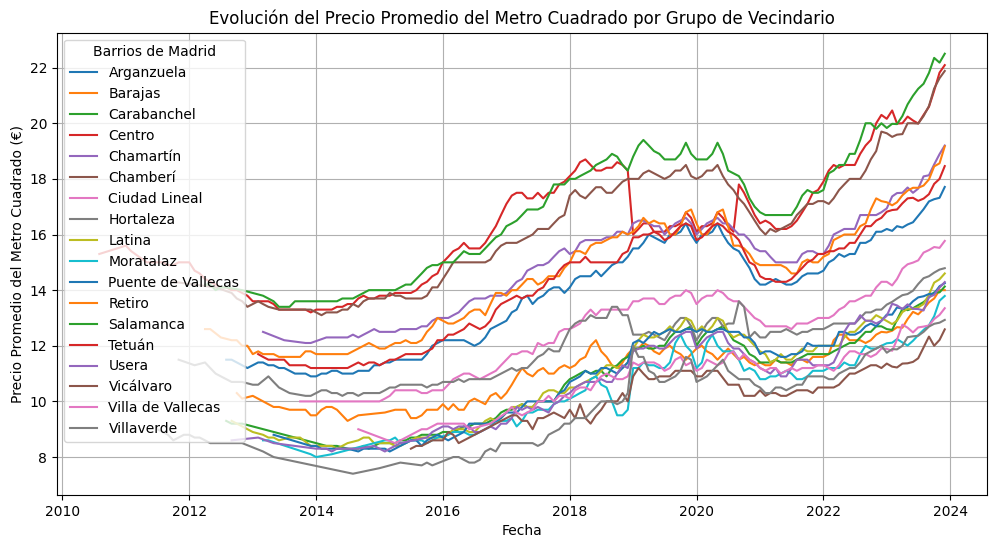

In [27]:
## Gráfico 5: Evolución del precio promedio del metro cuadrado (m2_price) por neighbourhood_group a lo largo del tiempo. ¿Como ha cambiado a lo largo del tiempo?

df['date'] = pd.to_datetime(df['date'])

price_trend = df.groupby(['neighbourhood_group', 'date'])['m2_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
for group in price_trend['neighbourhood_group'].unique():
    subset = price_trend[price_trend['neighbourhood_group'] == group]
    plt.plot(subset['date'], subset['m2_price'], label=group)

plt.title('Evolución del Precio Promedio del Metro Cuadrado por Grupo de Vecindario')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio del Metro Cuadrado (€)')
plt.legend(title='Barrios de Madrid')
plt.grid()
plt.show()

* Se observa que los precios medios del metro cuadrado en todos los barrios de Madrid han seguido más o menos la misma tendencia.
* Se observa que en 2019 el precio medio por metro cuadrado de las propiedades en el Centro tiene una destacable caida de 18 a 16, y no vuelve a subir de manera constante hasta 2022.
* Se observa tambien que el precio más caro por metro cuadrado actualmente lo tiene el barrio de Carabanchel, con un valor de 22 €/m^2.
* El precio medio por metro cuadrado más bajo está en Vicálvo desde 2020, y anteriormente con diferencia estaba en Villaverde.

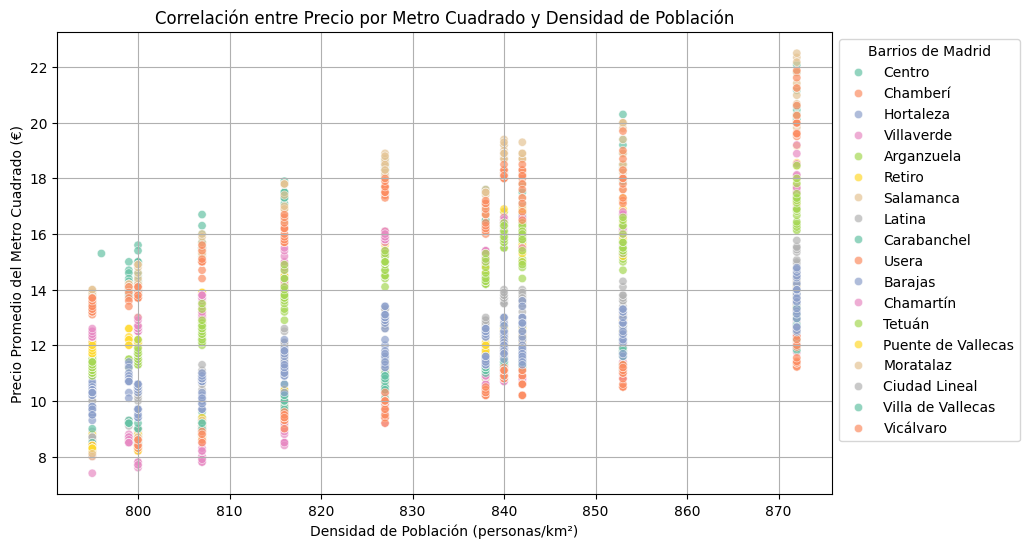

In [28]:
### Gráfico 6: ¿Existe una correlación entre el precio  por metro cuadrado y la densidad de la problación?

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='population_density',
    y='m2_price',
    hue='neighbourhood_group',
    palette='Set2',
    alpha=0.7
)

plt.title('Correlación entre Precio por Metro Cuadrado y Densidad de Población')
plt.xlabel('Densidad de Población (personas/km²)')
plt.ylabel('Precio Promedio del Metro Cuadrado (€)')
plt.legend(title='Barrios de Madrid', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

* No parece haber una correlación lineal clara entre la densidad de población y el precio del metro cuadrado.
* Los puntos se encuentran bastante dispersos y no siguen un patrón ascendente o descendente obvio. Algunos vecindarios tienen precios significativamente más altos, aunque la densidad de población no cambia demasiado.
* Por ejemplo: Salamanca, Chamberí y Centro tienen precios más elevados incluso con densidades moderadas. Vecindarios como Villaverde y Puente de Vallecas tienen precios más bajos, a pesar de tener densidades similares.

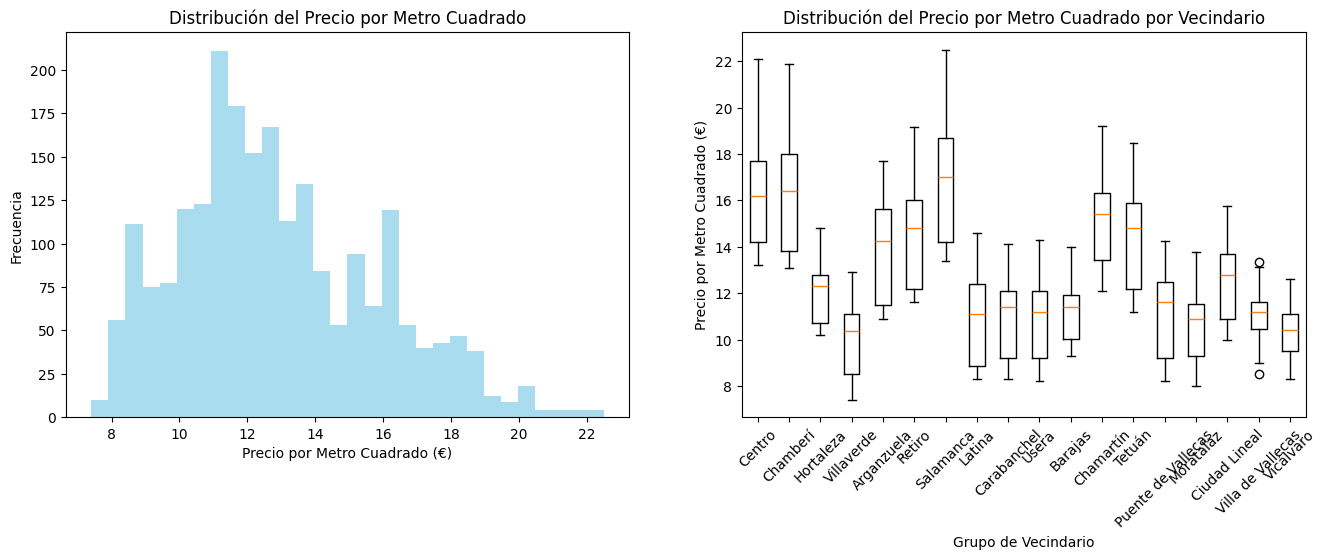

In [31]:
## Gráfico 7: Distribución del precio medio por propiedad ¿Tienen todas las viviendas más o menos el mismo precio? ¿Varía según el barrio en el que te encuentres?

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.hist(df['m2_price'], bins=30, color='skyblue', alpha=0.7)
ax1.set_title('Distribución del Precio por Metro Cuadrado')
ax1.set_xlabel('Precio por Metro Cuadrado (€)')
ax1.set_ylabel('Frecuencia')

neighbourhood_groups = df['neighbourhood_group'].unique()
boxplot_data = [df[df['neighbourhood_group'] == group]['m2_price'] for group in neighbourhood_groups]

ax2.boxplot(boxplot_data, labels=neighbourhood_groups)
ax2.set_title('Distribución del Precio por Metro Cuadrado por Vecindario')
ax2.set_xlabel('Grupo de Vecindario')
ax2.set_ylabel('Precio por Metro Cuadrado (€)')
ax2.tick_params(axis='x', rotation=45)
plt.show()


* No existe una distribución clara de los precios sino que se encuentran en el rango de 8 a 22, con la frecuencia máxima en 11 pero con mucha volatilidad.
* En cuanto al precio medio por metro cuadrado por vecindario, los vecindarios con mayor precio por metro cuadrado son Centro, Chamberí y Retiro, y los que menores precios tienen son Hortaleza, Vicálvaro y Puente de Vallecas.


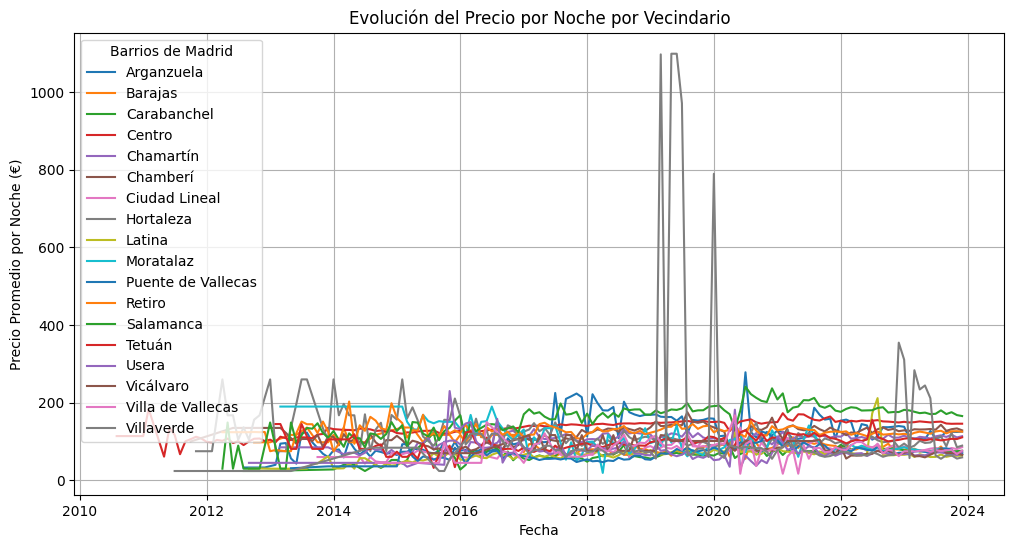

In [33]:
### Gráfico 8: ¿Cual es la evolución del precio por noche según vecindario?

night_price_trend = df.groupby(['neighbourhood_group', 'date'])['nigth_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
for group in night_price_trend['neighbourhood_group'].unique():
    subset = night_price_trend[night_price_trend['neighbourhood_group'] == group]
    plt.plot(subset['date'], subset['nigth_price'], label=group)

plt.title('Evolución del Precio por Noche por Vecindario')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio por Noche (€)')
plt.legend(title='Barrios de Madrid')
plt.grid()
plt.show()

Conclusiones:
* El Barrio de Villaverde ha tenido momentos especificos donde el precio por noche ha subido de manera muy evidente en comparación con el promedio de precio por noche normal. Es decir, de normal el precio medio por noche no sube de 200 €, mientras que en momentos puntuales entre 2018 y 2020 ha llegado a estar en valores superiores a 1000.
* El resto de los varios han tenido volatilidad, pero siempre estando todos en el rango de 0 a 200€ por noche.

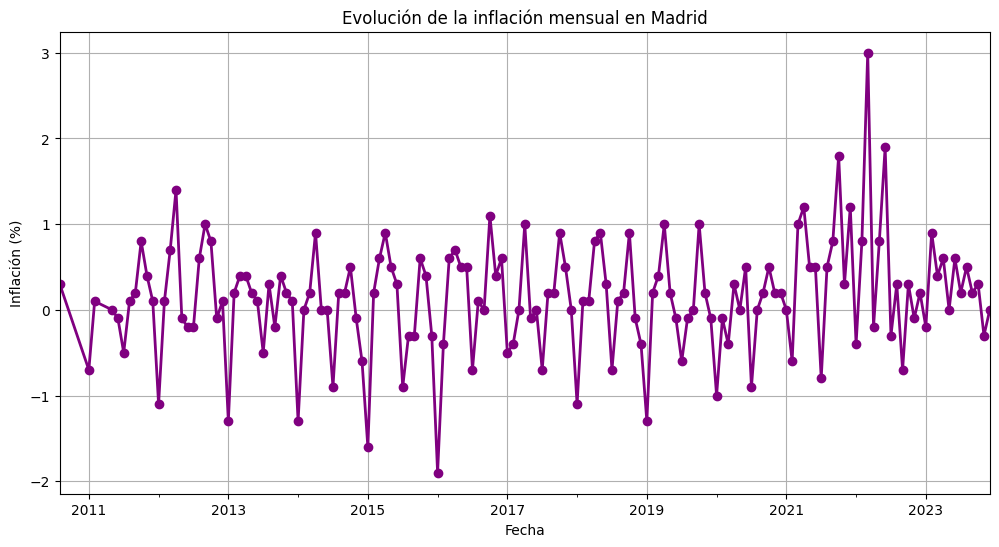

In [56]:
### Gráfico 9: ¿Afecta la inflación al precio por noche de una propiedad?

monthly_inflation = df.groupby(df['date'].dt.to_period('M'))['inflation'].mean()

plt.figure(figsize=(12, 6))
monthly_inflation.plot(kind='line', linewidth=2, color='purple', marker='o')

plt.title('Evolución de la inflación mensual en Madrid')
plt.xlabel('Fecha')
plt.ylabel('Inflación (%)')
plt.grid()

plt.show()



En este caso, yo pensaba que si subía la inflación entonces los precios por noche de las propiedades bajarían para poder ajustarse a los efectos macroeconomicos y entonces tener reservas. Sin embargo, a través de este gráfico se observa que, aunque la inflación siga subiendo y haya incluso llegado a su pico en mitad de 2022, los precios de las propiedades no bajan en ningún momento por lo que el precio medio por propiedad no se ve influenciado por la inflación.


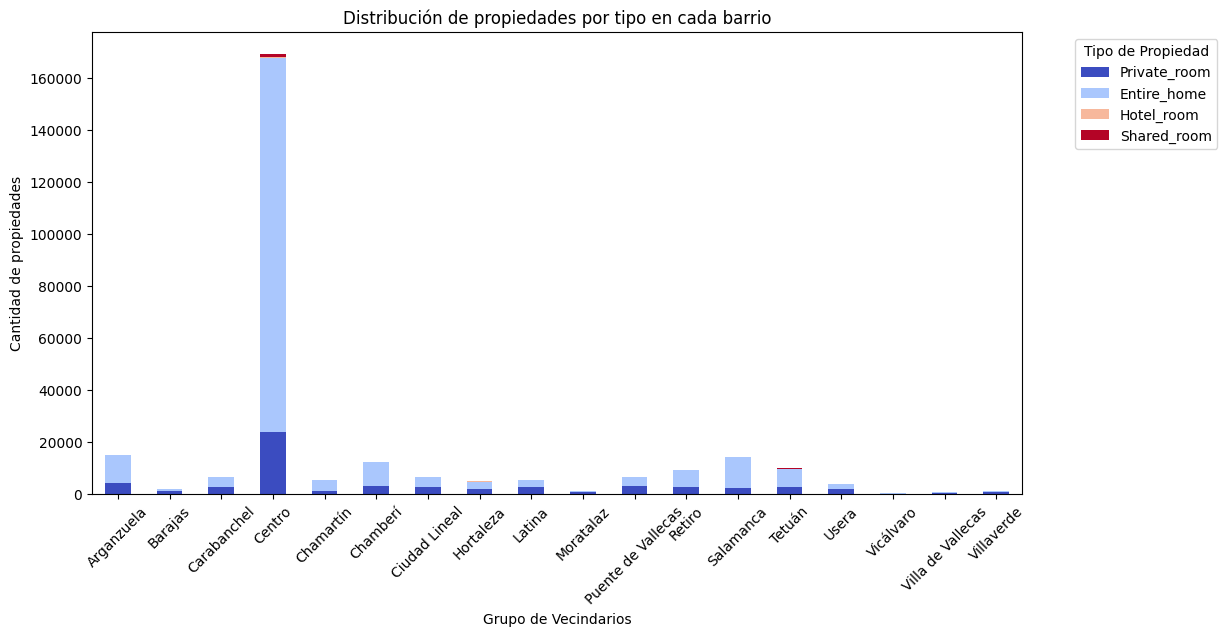

In [54]:
### Gráfica 10: ¿Como se distribuyen las diferentes categorías de propiedades en cada barrio?

property_distribution = df.groupby('neighbourhood_group')[['Private_room', 'Entire_home', 'Hotel_room', 'Shared_room']].sum()

property_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')

plt.title('Distribución de propiedades por tipo en cada barrio')
plt.xlabel('Grupo de Vecindarios')
plt.ylabel('Cantidad de propiedades')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Propiedad', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



* El gráfico me permite identificar que barrios tienen más propiedades completas frente a habitaciones privadas o habitaciones compartidas. En este caso, una vez más vemos que en total, el barrio que más propiedades tienen es el Centro, donde la gran mayoría son pisos enteros, y existen muy pocas habitaciones de hotel o cuartos compartidos
* Vicálvaro y Villa de Vallecas son los barrios con menos propiedades listadas.



## Pregunta 2

Voy a hacer un modelo inicial con varias variables, y despues eliminar las no significativas para crear un modelo con mejor capacidad de predicción.


In [37]:
## Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)

features = ['inflation', 'availability_365', 'number_of_reviews', 'reviews_per_month', 'nigth_price', 'population_density', 'listings_count', 'hosts_count']
target = 'm2_price'

data = df[features + [target]].dropna()

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [38]:
coeficientes = pd.DataFrame({'Variable': features, 'Coeficiente': model.coef_})
print(coeficientes)


             Variable  Coeficiente
0           inflation     0.019999
1    availability_365     0.000898
2   number_of_reviews     0.008844
3   reviews_per_month    -0.853217
4         nigth_price     0.008960
5  population_density     0.060699
6      listings_count    -0.013898
7         hosts_count     0.031547


In [39]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nError cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R^2): {r2:.2f}")


Error cuadrático medio (MSE): 3.72
Coeficiente de determinación (R^2): 0.56


In [40]:
### Ahora elimino variables no significativas como: availability_365, number_of_reviews, nigth_price

features = ['inflation', 'reviews_per_month','population_density', 'listings_count', 'hosts_count']
target = 'm2_price'

data = df[features + [target]].dropna()

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [41]:
coeficientes = pd.DataFrame({'Variable': features, 'Coeficiente': model.coef_})
print(coeficientes)


             Variable  Coeficiente
0           inflation    -0.022664
1   reviews_per_month    -0.016073
2  population_density     0.039268
3      listings_count    -0.015616
4         hosts_count     0.035357


In [42]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nError cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R^2): {r2:.2f}")


Error cuadrático medio (MSE): 4.39
Coeficiente de determinación (R^2): 0.48


Al eliminar las variables que se veían que no eran significativas inicialmente en mi modelo como son: availability_365, number_of_reviews, nigth_price observo que mi modelo tiene un mayor error cuadrático medio (MSE) y un menor coeficiente de determinación por lo que me quedo con el modelo inicial.

Con el modelo inicial observo esto de mis variables:

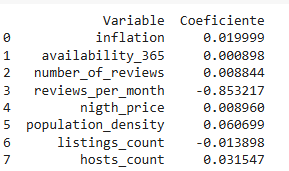          

de manera que se observa que la variable que más impacta pero de manera opuesta al precio por metro cuadrado es reviews_per_month, mientras que inflacion, population_density y hosts_count son los que más positivamente ayudan a precedir el valor del precio del metro cuadrado.

En ambos casos el valor de R^2 no es muy alto, (0.6 el valor más alto) por lo que esto indica que cambios en los predictores no están del todo relacionados con cambios en la variable de respuesta

## Pregunta 3

In [43]:
## Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)

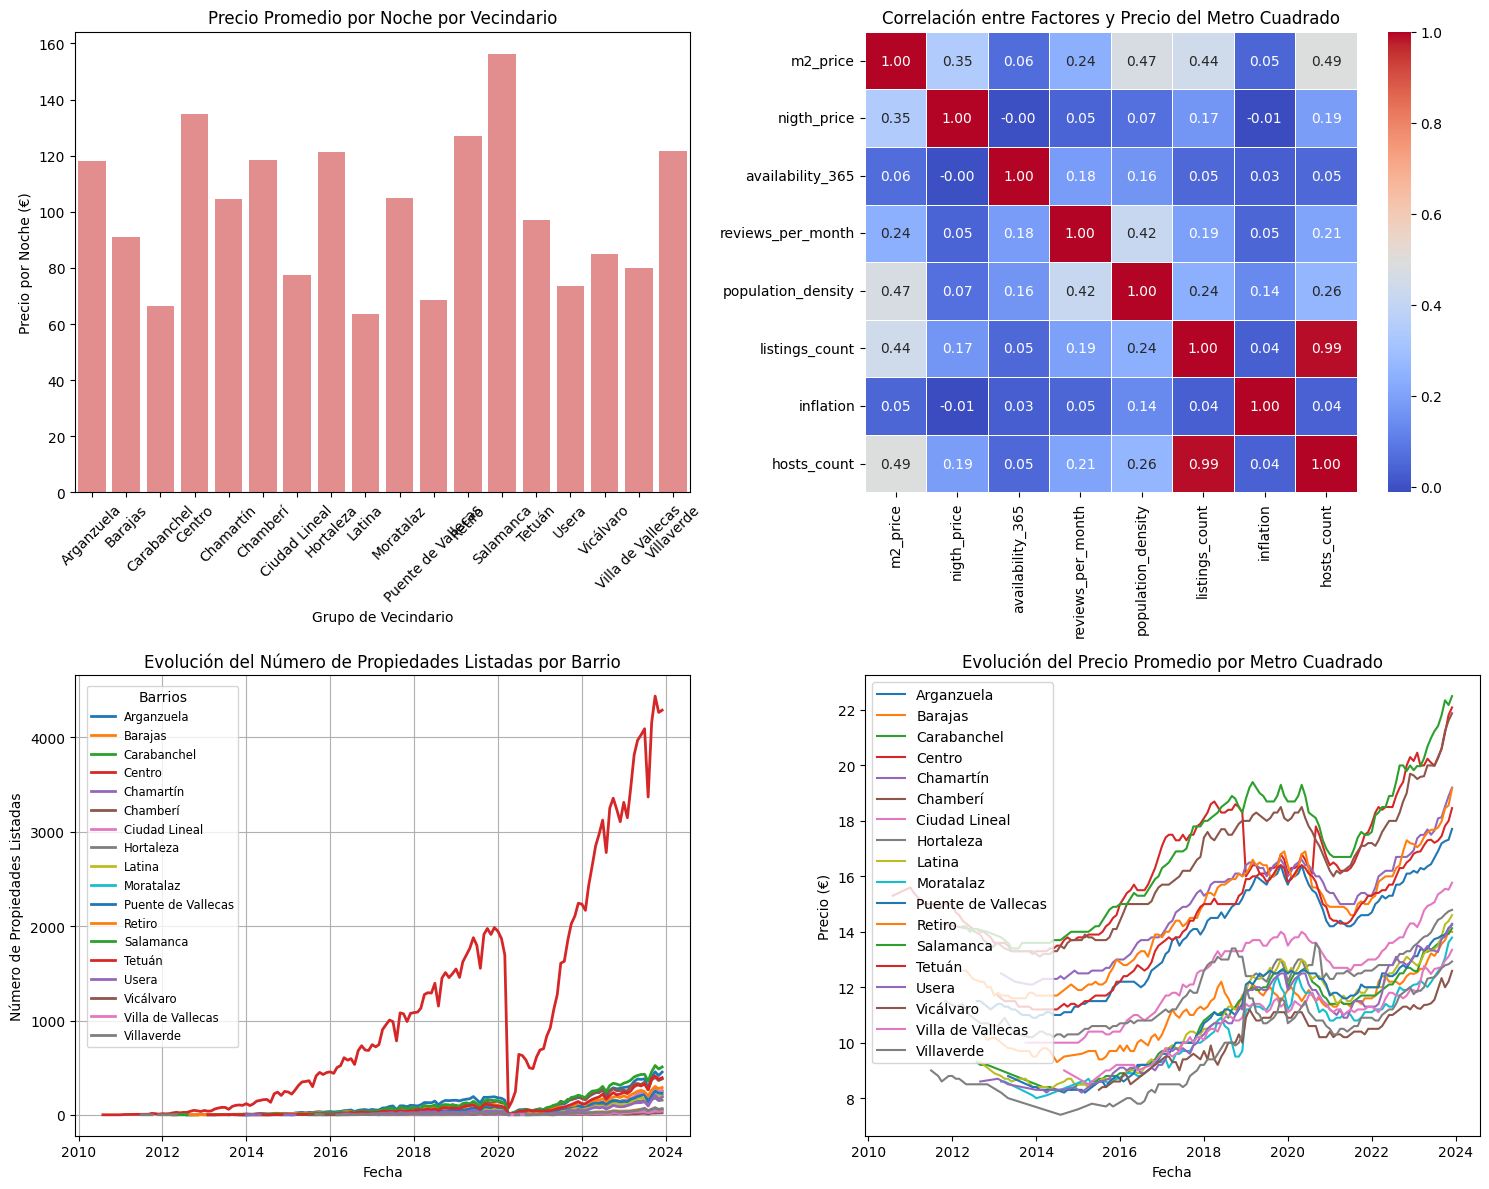

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

### 1. Precio promedio por noche
night_price_summary = df.groupby('neighbourhood_group')['nigth_price'].mean().reset_index()
sns.barplot(
    data=night_price_summary, x='neighbourhood_group', y='nigth_price',
    color='lightcoral', ax=axes[0, 0]
)
axes[0, 0].set_title('Precio Promedio por Noche por Vecindario')
axes[0, 0].set_xlabel('Grupo de Vecindario')
axes[0, 0].set_ylabel('Precio por Noche (€)')
axes[0, 0].tick_params(axis='x', rotation=45)

### 2. Matriz de correlación
correlation_data = df[['m2_price', 'nigth_price', 'availability_365', 'reviews_per_month',
                       'population_density', 'listings_count', 'inflation', 'hosts_count']]
correlation_matrix = correlation_data.corr()
sns.heatmap(
    correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
    ax=axes[0, 1]
)
axes[0, 1].set_title('Correlación entre Factores y Precio del Metro Cuadrado')

### 3. Evolución del número de propiedades listadas por barrio
temporal_data = df.groupby(['date', 'neighbourhood_group'])['listings_count'].sum().unstack()
for column in temporal_data.columns:
    axes[1, 0].plot(temporal_data.index, temporal_data[column], label=column, linewidth=2)
axes[1, 0].set_title('Evolución del Número de Propiedades Listadas por Barrio')
axes[1, 0].set_xlabel('Fecha')
axes[1, 0].set_ylabel('Número de Propiedades Listadas')
axes[1, 0].legend(title='Barrios', loc='upper left', bbox_to_anchor=(0.01, 0.99), fontsize='small')
axes[1, 0].grid()

### 4. Evolución del precio medio por metro cuadrado
price_trend = df.groupby(['neighbourhood_group', 'date'])['m2_price'].mean().reset_index()
for group in price_trend['neighbourhood_group'].unique():
    subset = price_trend[price_trend['neighbourhood_group'] == group]
    axes[1, 1].plot(subset['date'], subset['m2_price'], label=group)
axes[1, 1].set_title('Evolución del Precio Promedio por Metro Cuadrado')
axes[1, 1].set_xlabel('Fecha')
axes[1, 1].set_ylabel('Precio (€)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()
